# The Bias-Variance Tradeoff
October 13, 2024


## Quick Intro to Statistical Learning
In statistical learning, we assume that we are given a set of $n$ datapoints $\{x_i, y_i\}_{i=1}^n$ that are iid (independent and identically distributed) and sampled from $(x_i, y_i) \sim \text{P}_{X,Y}$. We call this the "train set." We use this set to learn a model $\hat{f}(x)$ tha approximates the "true" mapping $f(x): X \rightarrow Y.$ We assume that all other data within the support of our distribution $P_{XY}$ but outside our training data are also iid. We call this set "test set."

We assume the general form of the "true" mapping $f(x): X \rightarrow Y$ as: 

$Y = f(x) + \epsilon$

$f(x)$ is what we want to estimate while $\epsilon$ is the "irreducible error" that are caused by inherent noise or factors that are unobserved or unmeasured. This is fine since we cannot practically expect to have access to all the variables that affect our "response" or "output" variable $Y$. But it's important that $\epsilon$ has a mean of 0 and is indipendent of $X$, $Y$, or $f(X)$ so that it does not introduce any systematic errors or bias in the system.

Our goal is to use our train set to learn $\hat{f}(x)$ such that it is close to the true function $f(x)$. What about the irreducible noise $\epsilon$? We want to avoid learning it because it does not inform us of the mapping $X \rightarrow Y$.

## Mean Squared Error
We focus on predicting a quantitative response variable or output $Y$ from input variables $X$. This task is called "regression." One way to compute the goodness of fit of our approximation $\hat{f}(x)$ to $f(x)$ is the expected value of the squared loss, which we call error or risk:

$\text{Error}(\hat{f}) = \mathbb{E}[(\hat{f}(x)) - f(x))^2]$

Where the expectation is computed over the underlying true distribution. However, in practice, we don't have access to the true distribution. We are only given the training data. So how do we estimate this error? 

Given that we have $n$ training data, the error can be estimated by what's called the "Mean Squared Error" (MSE):

$\text{MSE}(\hat{f}) = \frac{1}{n}\sum_{i=1}^n((\hat{f}(x_i) - y_i)^2)$ 

where $y_i = f(x_i) + \epsilon$ is the ground truth output variable.

Now if we compute the MSE on the train set, we call it train error, while if we compute it on the test set, we call it test error. In general, the train error is higher than the test error. In the case where the train error goes down while the test error goes up, we say that we are "overfitting."

Our goal is to find a model $\hat{f}(x)$ that minimizes the error (or its approximate MSE) on the test set (not the train set).

## Bias-Variance Trade-off

It turns out, there's a fundamental relationship between two metrics in statistical learning: the bias-variance trade-off. Let's first look at the formula relating the (expected) test error (which is what we care about) to the bias and variance of our learned model $\hat{f}(x)$:

$\mathbb{E}[(\hat{f}(x)) - f(x))^2] = \text{bias}^2 + \text{variance} + \text{var}(\epsilon)$

Where

* $\text{bias}^2 := \mathbb{E}[(\mathbb{E}[\hat{f}(x)] - f(x))^2]$
* $\text{variance} := \mathbb{E}[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2]$
* $\text{var}(\epsilon)$ is just the variance of the irreducible error (noise). We don't need to think about this

Essentially, this tells us that we can decompose the expected error into bias and variance terms. The bias is how different the expected learned model is from the ground truth mapping $f(x)$(assuming we train multiple times on different training data). The variance is a measure of how different our models are from each other (how spread out).

Ideally we want both bias and variance to be 0. In which case the expected error is essentially the irreducible error. However, we almost never reach this state. (This is a consequence of relying on a limited dataset and not having access to the true underlying data distribution and it's generally non-trivial to separate the noise $\epsilon$ from the systematic mapping $f(x)$). What happens instead is we trade-off bias for variance or vice versa. The best we can do in most cases if find the right balance between these two that minimizes the expected error.

How do we compute these?

First, we need to have access to the ground truth underlying mapping $Y = f(X) + \epsilon$. Note that the bias-variance trade-off cannot be computed directly in practice since we don't know $f(X)$ which is what we're trying to model in the first place. So this gives us a mental model and theoretical understanding about managing model flexibility to balance bias and variance. We will go back to model flexibility later.

Now, imagine having say $k$ different independently-built train sets of $n$ samples each, with each set sampled iid from a fixed underlying distribution $P_{XY}$. Now imagine drawing another set for testing from the same distribution. We shall fix the test set.

Now, we fit a model $\hat{f}(x)$ on each of the $k$ train sets thus giving us a set of $k$ fitted models. We can then approximate the expected value $\mathbb{E}[\hat{f}(x)] \approx \frac{1}{k}\sum_{i=1}^k(\hat{f}(x_k))$ at $x$ over the $k$ training datasets. Now we can see how to compute the bias and variance from here (sorry, tinamad mag-explain).



## Relation to Model Flexibility

Model flexibility is how much the model aligns with our training data. Linear regression has low flexibility because it will only fit a line even if the underlying function has curves. Meanwhile, a highly complex neural network can fit non-linear (curvy or wavy) relations between $X$ and $Y$. However, if the model is too complex, it's possible the model ends up fitting on the uninformative irreducible error $\epsilon$ - in which case, overfitting happens. We want to find a sweet spot in terms of model flexibility where we reduce the "reducible error" $(\hat{f}(x)) - f(x))^2$ while discarding $\epsilon$. 

Intuitively, the more flexible the model, the mode "degrees of freedom" it has to fit the training data. But in doing so, it may be already fitting on the irreducible error. This will give us worse test set performance. Vapnik et al. provided a way to quantify the lower bound of the difference between the MSE based on the train set and the true expected error across all possible data in the underlying data distribution. Essentially, the more complex the model, the larger the lower bound of the difference between the train MSE and true expected error (See Vapnik et al on discussion about the VC dimension and its connection to model complexity).

This is why there are many strategies that aim to balance too low vs too high flexibility such as regularization and architectural modifications.

How is model flexibility is related to the bias-variance trade-off? 

It turns out that the lower the flexibility of the model, the harder it is to reduce the reducible error between the fitted function and the underlying true function. But if your model is too flexible, it may fit the noise such that sure we may reduce the bias since we're now able to fit the complicated function, but it may introduce more variance since we run the risk of overfitting on the noise of our train set. If we change train sets, we expect to learn another kind of function that is quite different from the first one.

## Experiments

We first define a synthetic dataset following $y = f(x) + \epsilon$. In our experiment, we use

 $y = x + 20 sin(x/5) + \epsilon$ 
 
 where $\epsilon \sim N(0, 20)$

 We fix $x = 1, 2, ..., 50$ and randomly generate $y$. The test set is a fixed set of $\{x_i, y_i\}_{i=1}^{50}$, while the $k$ train sets are distinct randomly sampled sets from the same data generating function above.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
import pandas as pd

In [31]:
def gen_data(seed = 0, prop=1):
    np.random.seed(seed)
    x = np.arange(1, 51)
    x = np.random.choice(x, size=int(prop * len(x)), replace=False)
    f_x = x + 20 * np.sin(x/5)
    eps = np.random.normal(0, 20, size=len(x))
    y = f_x + eps
    x = x.astype(np.float32)
    y = y.astype(np.float32)

    inds = np.argsort(x)
    x = x[inds]
    y = y[inds]
    eps = eps[inds]
    f_x = f_x[inds]

    return x, f_x, y, eps

The test set looks like this.

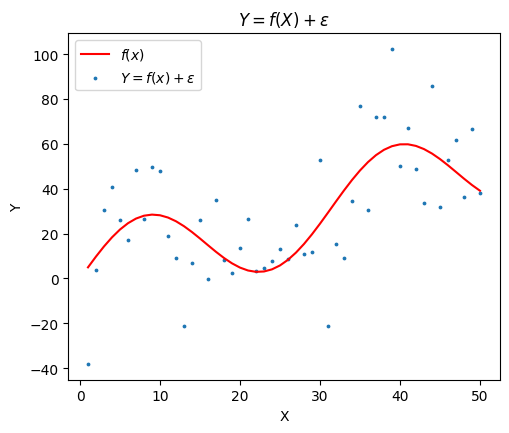

In [32]:
X, f_x, Y, eps = gen_data(seed=0, prop=1)
plt.figure(figsize=(5,4))
plt.plot(X, f_x, label='$f(x)$', c='r')
plt.scatter(X, Y, label='$Y = f(x) + \epsilon$', s=3)
plt.tight_layout()
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("$Y = f(X) + \epsilon$")
plt.show()

We next define a simple multilayer perceptron (MLP) neural network with batch norm and Kaiming normal initialization. These are pretty standard architectural decisions. I found that the model isn't able to fit beyond a linear model if batch norm isn't used.

In [33]:
# Define the neural network model
class Net(nn.Module):
    def __init__(self, count = 256):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, count)    # Input layer to first hidden layer
        self.bn1 = nn.BatchNorm1d(count)  # Batch normalization after first hidden layer
        self.fc2 = nn.Linear(count, count)   # First hidden layer to second hidden layer
        self.bn2 = nn.BatchNorm1d(count)  # Batch normalization after second hidden layer
        self.fc3 = nn.Linear(count, 1)    # Second hidden layer to output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = torch.relu(x)
        x = self.fc3(x)        
        return x


In [34]:
# for ease of trial
class Trial:
    def __init__(self, count_neurons=256):
        # load model
        self.model = Net(count=count_neurons)
        self.model.to("mps")

        # Define loss function and optimizer
        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.01)

    def train(self, X, Y, num_epochs=1000):
        X_tensor = torch.from_numpy(X).unsqueeze(1).to("mps") # add a batch size dimension
        Y_tensor = torch.from_numpy(Y).unsqueeze(1).to("mps") # add a batch size dimension

        # Training loop
        for epoch in range(num_epochs):
            # Zero the parameter gradients
            self.optimizer.zero_grad()
            
            # Forward pass
            outputs = self.model(X_tensor)
            loss = self.criterion(outputs, Y_tensor)
            
            # Backward pass and optimization
            loss.backward()
            self.optimizer.step()

    def visualize(self, X, Y, f_x, ax):
        X_new_tensor = torch.from_numpy(X).unsqueeze(1).to("mps")
        self.model.eval()
        with torch.no_grad():
            self.Y_pred = self.model(X_new_tensor).detach().cpu().numpy().flatten()

        ax.plot(X, f_x, c='r', label='$f(x)$')
        ax.plot(X, self.Y_pred, c='g', label='$\hat{f}(x)$')
        ax.scatter(X, Y, s=3, alpha=0.25) # label = "$Y = f(x) + \epsilon$")

We train four models with varying number of hidden neurons. We assume that the number of neurons as the proxy for model flexibility.

We visualize here the results of 18 trials per model trained for 100 epochs each

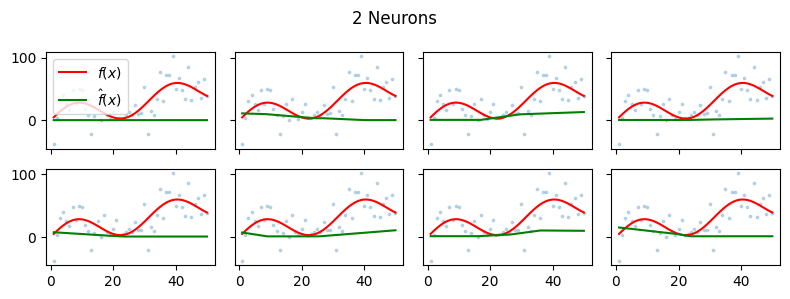

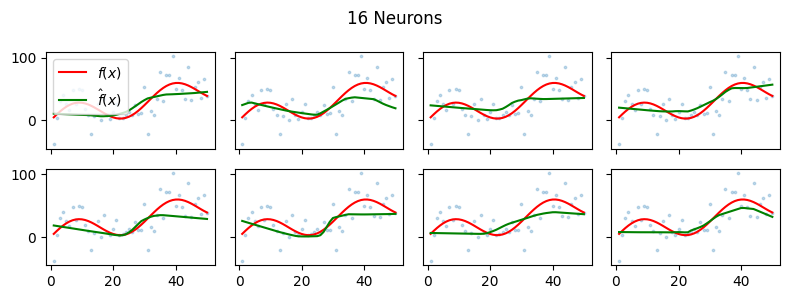

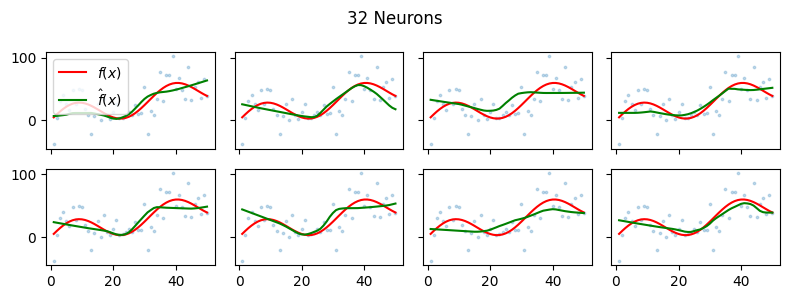

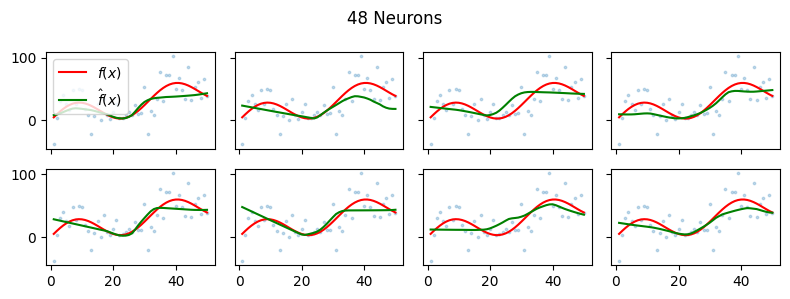

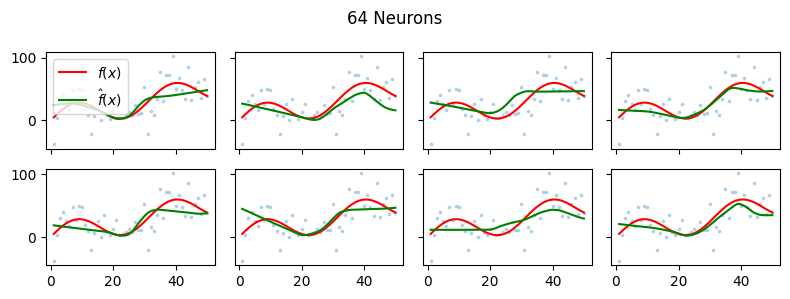

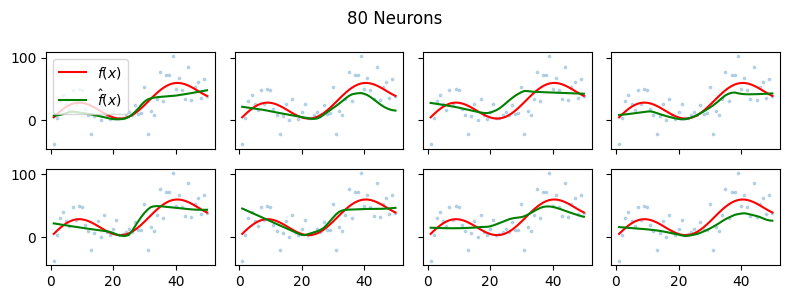

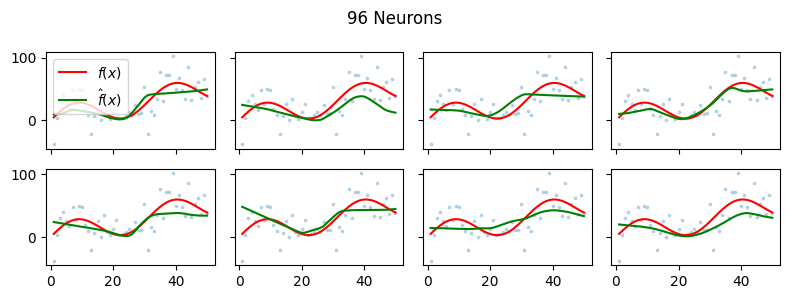

In [57]:
num_epochs = 100
prop_train = 1
k_train = 8

X_test, f_x_test, Y_test, eps = gen_data(seed=0, prop=1)
results = {}
for count_neurons in [2, 16, 32, 48, 64, 80, 96]: # modifies flexibility
    preds = [] # used to compute the bias and variance
    fig, axs = plt.subplots(2, 4, figsize=(8, 3), sharex=True, sharey=True)
    axs = axs.flatten()

    for i in range(0, k_train):
        # we pick a different train set iid sampled from P_XY
        X, f_x, Y, eps = gen_data(seed=i+1, prop=prop_train) # seed > 1 for train

        trial = Trial(count_neurons=count_neurons)
        trial.train(X, Y, num_epochs=num_epochs)
        trial.visualize(X_test, Y_test, f_x_test, axs[i])

        if i == 0:
            axs[i].legend()

        # track average squared bias
        preds += [trial.Y_pred]
        
    plt.suptitle(f"{count_neurons} Neurons")
    plt.tight_layout()    
    plt.show()

    # compute the bias and variance
    preds = np.array(preds)
    mean_preds = preds.mean(axis=0)
    bias_squared = np.mean((mean_preds - f_x_test)**2)
    variance = np.mean((preds - mean_preds)**2)
    results[count_neurons] = [bias_squared, variance]


We find that in this simple example, the higher the number of hidden neurons per layer (proxy for flexibility), the more the model seems to fit the noise. We find that the higher the number of neurons, the lower the squared bias but the higher the variance. 

This experiment helps illustrate the idea behind the bias-variance trade-off.

In [58]:
df = pd.DataFrame.from_dict(results).T.reset_index()
df.columns = ["count_neurons", "bias", "variance"]
df

,count_neurons,bias,variance
0,2,975.316478,13.969402
1,16,119.106269,35.902462
2,32,58.860907,41.729862
3,48,77.698426,40.024990
4,64,74.267053,38.466969
5,80,84.223969,50.063202
6,96,93.414220,50.083187


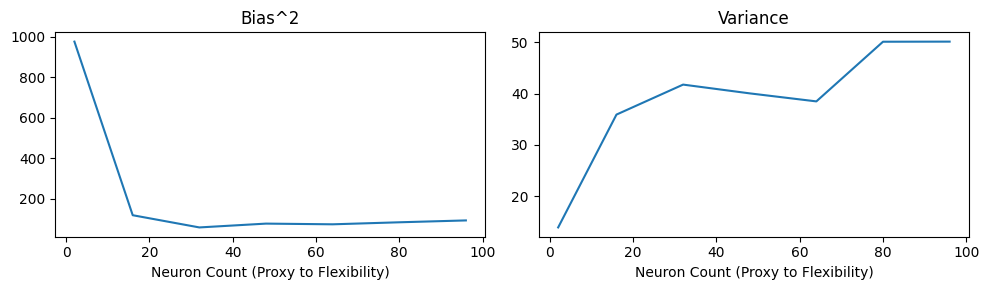

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].plot(df.count_neurons, df.bias)
axs[1].plot(df.count_neurons, df.variance)
axs[0].set_xlabel("Neuron Count (Proxy to Flexibility)")
axs[1].set_xlabel("Neuron Count (Proxy to Flexibility)")
axs[0].set_title("Bias^2")
axs[1].set_title("Variance")
# plt.semilogy()
plt.tight_layout()
plt.show()